# 准备数据 

In [ ]:
#title 下载 Tacotron 2
!git clone https://github.com/CjangCjengh/tacotron2-japanese tacotron2
!git submodule init
!git submodule update

Cloning into 'tacotron2'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 199 (delta 74), reused 52 (delta 52), pack-reused 106
Receiving objects: 100% (199/199), 2.37 MiB | 11.69 MiB/s, done.
Resolving deltas: 100% (100/100), done.
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


## 下载Speaker Verification

In [ ]:
%cd /content
!git clone https://github.com/HarryVolek/PyTorch_Speaker_Verification.git Speaker_verification

/content
Cloning into 'Speaker_verification'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 94 (delta 46), reused 88 (delta 40), pack-reused 0
Unpacking objects: 100% (94/94), 57.60 KiB | 2.21 MiB/s, done.


# 下载librispeech

In [ ]:
#title 下载 librispeech
%cd /content
!wget --no-check-certificate -r https://us.openslr.org/resources/12/train-clean-100.tar.gz

/content
--2023-02-03 03:32:17--  https://us.openslr.org/resources/12/train-clean-100.tar.gz
Resolving us.openslr.org (us.openslr.org)... 46.101.158.64
Connecting to us.openslr.org (us.openslr.org)|46.101.158.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6387309499 (5.9G) [application/x-gzip]
Saving to: ‘us.openslr.org/resources/12/train-clean-100.tar.gz’

us.openslr.org/reso 100%[===================>]   5.95G  6.56MB/s    in 4m 51s  

2023-02-03 03:37:08 (20.9 MB/s) - ‘us.openslr.org/resources/12/train-clean-100.tar.gz’ saved [6387309499/6387309499]

FINISHED --2023-02-03 03:37:08--
Total wall clock time: 4m 51s
Downloaded: 1 files, 5.9G in 4m 51s (20.9 MB/s)


## 解压

In [ ]:
%cd /content/us.openslr.org/resources/12
import tarfile
filename = "train-clean-100.tar.gz"
tf = tarfile.open(filename)
tf.extractall('/content')

/content/us.openslr.org/resources/12


In [ ]:
!pip install resemblyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 KB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 KB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp38-cp38-linux_x86_64.whl size=81059 sha256=d0ed095983c9adeea4c54c21d9057c1ff662e7b4e30160e3befa718e94b50ee7
  Stored in directory: /root/.cache/pip/wheels/75/e1/fc/01099a9fd0882ce84cc99eb51495812bb8a703461c2b0ca1cb
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26323 sha256=8d982c98e23eef1a5e196ab3ba670c5a83ac58e07c143c138369b44697f6309a
  Stored in directory: /root/.cache/pip/wheels/5e/5d/01/3083e091b57809dad979ea543def62d9d878950e3e74f0c930
Successfully built webrtcvad typing


In [ ]:
from resemblyzer import VoiceEncoder, preprocess_wav
from pathlib import Path
import numpy as np

encoder = VoiceEncoder()

def embedder(path):
  fpath = Path(path)
  wav = preprocess_wav(fpath)
  embed = encoder.embed_utterance(wav)
  np.set_printoptions(precision=3, suppress=True)
  print(embed)
  return embed

path1 = "/content/LibriSpeech/train-clean-100/103/1240/103-1240-0000.flac"
path2 = "/content/LibriSpeech/train-clean-100/103/1240/103-1240-0001.flac"
a = embedder(path1)
b = embedder(path2)

np.sqrt(sum((a - b) ** 2))

Loaded the voice encoder model on cuda in 0.01 seconds.
[0.    0.003 0.    0.    0.075 0.062 0.    0.003 0.019 0.026 0.233 0.127
 0.13  0.    0.005 0.016 0.045 0.031 0.    0.    0.    0.102 0.    0.
 0.    0.068 0.    0.    0.    0.    0.098 0.101 0.009 0.019 0.    0.078
 0.069 0.    0.    0.003 0.    0.009 0.007 0.02  0.003 0.065 0.    0.082
 0.006 0.136 0.    0.05  0.    0.    0.    0.    0.    0.    0.09  0.
 0.105 0.007 0.038 0.    0.037 0.    0.106 0.101 0.    0.    0.    0.005
 0.032 0.091 0.    0.004 0.    0.    0.    0.043 0.002 0.    0.074 0.02
 0.    0.005 0.    0.06  0.    0.003 0.018 0.    0.    0.005 0.    0.
 0.    0.    0.    0.    0.    0.    0.051 0.185 0.004 0.102 0.    0.009
 0.    0.191 0.    0.037 0.179 0.146 0.181 0.    0.015 0.    0.    0.004
 0.021 0.    0.    0.075 0.    0.164 0.011 0.039 0.1   0.    0.    0.
 0.    0.056 0.018 0.169 0.035 0.    0.069 0.001 0.    0.    0.09  0.
 0.107 0.    0.008 0.    0.039 0.01  0.08  0.06  0.    0.    0.013 0.01
 0.    0.103

In [ ]:
0.32851875617082016 # 103-1240-0000.flac 与 103-1240-0001.flac 
0.26058360973547556 # 103-1240-0002.flac 与 103-1240-0001.flac （同一个人）

0.44962012182213046 # 103-1241-0000.flac 与 103-1240-0001.flac （非常接近的女声）

0.8664639574833781  # 1034-121119-0001.flac（男声偏低） 与 1040-133433-0000.flac（男声稍高）

0.9612862100030544  # 1034-121119-0001.flac（男声偏低） 与 103-1241-0000.flac

numpy.ndarray

In [ ]:
!git clone https://github.com/resemble-ai/Resemblyzer.git


Cloning into 'Resemblyzer'...
remote: Enumerating objects: 608, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 608 (delta 1), reused 6 (delta 1), pack-reused 602
Receiving objects: 100% (608/608), 101.47 MiB | 47.25 MiB/s, done.
Resolving deltas: 100% (108/108), done.


In [ ]:
!pip uninstall umap
!pip install umap-learn

/content/Resemblyzer


Preprocessing wavs: 100%|██████████| 130/130 [00:02<00:00, 47.79it/s]
<ipython-input-3-2f76a4afe63d>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  wavs = np.array(list(map(preprocess_wav, tqdm(wav_fpaths, "Preprocessing wavs", len(wav_fpaths)))))


Loaded the voice encoder model on cuda in 0.02 seconds.


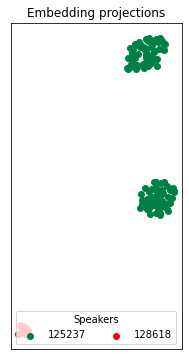

<Figure size 432x288 with 0 Axes>

In [ ]:
%cd /content/Resemblyzer
%matplotlib inline
from resemblyzer import preprocess_wav, VoiceEncoder
from demo_utils import *
from itertools import groupby
from pathlib import Path
from tqdm import tqdm
import numpy as np

wav_fpaths = list(Path("/content/LibriSpeech/train-clean-100/1088").glob("**/*.flac"))
speakers = list(map(lambda wav_fpath: wav_fpath.parent.stem, wav_fpaths))
wavs = np.array(list(map(preprocess_wav, tqdm(wav_fpaths, "Preprocessing wavs", len(wav_fpaths)))))
speaker_wavs = {speaker: wavs[list(indices)] for speaker, indices in 
                groupby(range(len(wavs)), lambda i: speakers[i])}

## 计算embeddings
encoder = VoiceEncoder()
utterance_embeds = np.array(list(map(encoder.embed_utterance, wavs)))


## 投影
plot_projections(utterance_embeds, speakers, title="Embedding projections")
plt.figure()
plt.show()


## 移动部分到需要的文件夹下

In [ ]:
import os
import shutil
%cd /content/LibriSpeech/train-clean-100/103/1240
old_path = os.getcwd()
new_path = '/content/Speaker_verification/train_tisv'
filelist = os.listdir(old_path)
for file in filelist:
    src = os.path.join(old_path, file)
    dst = os.path.join(new_path, file)
    print('src:', src)
    print('dst:', dst)
    shutil.move(src, dst)

/content/LibriSpeech/train-clean-100/103/1240


## 转换音频格式

In [ ]:
!pip install ffmpeg
!pip install soundfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6084 sha256=f6d7a45006d528b4fa5be37ecacd7aa7d0234412ee80b3dae9bee0e8564d46ff
  Stored in directory: /root/.cache/pip/wheels/30/33/46/5ab7eca55b9490dddbf3441c68a29535996270ef1ce8b9b6d7
Successfully built ffmpeg
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import librosa
import soundfile
import glob

src = os.path.join(new_path, '*.flac')
dst = os.path.join(new_path, '*.wav')
filelist = glob.glob(r'/content/Speaker_verification/train_tisv/*.flac')
for file in filelist:
  src = os.path.join(new_path, file)
  y,sr = librosa.load(src)
  name = os.path.splitext(file)[0] + '.wav'
  print(name)
  dst = os.path.join(new_path, name)
  soundfile.write(dst,y,sr)

# 安装依赖

In [1]:
#title 安装依赖
!pip install -U tensorflow==1.15.2
!pip install -q unidecode tensorboardX
!pip install librosa==0.8.0
!pip install pysoundfile==0.9.0.post1
!pip install inflect==5.6.2
!pip install janome==0.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==1.15.2 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0)
ERROR: No matching distribution found for tensorflow==1.15.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-

In [2]:
!pip install unidecode==1.3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install pyopenjtalk==0.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install janome==0.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#@title 加载Google云端硬盘
from google.colab import drive
drive.mount('drive')

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
#@title 创建文件夹和下载预训练模型
import os
if os.getcwd() != '/content/tacotron2':
    os.chdir('/content/tacotron2')
! gdown --id 1c5ZTuT7J08wLUoVZ2KkUs_VdZuJ86ZqA
if not os.path.isdir("wavs"):
    os.mkdir('wavs')
if not os.path.isdir("outdir"):
    os.mkdir("outdir")

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1c5ZTuT7J08wLUoVZ2KkUs_VdZuJ86ZqA
To: /content/tacotron2/tacotron2_statedict.pt
100% 113M/113M [00:00<00:00, 199MB/s] 


### 上传数据

`text file` 是音频文件列表

`audio files` 是音频文件

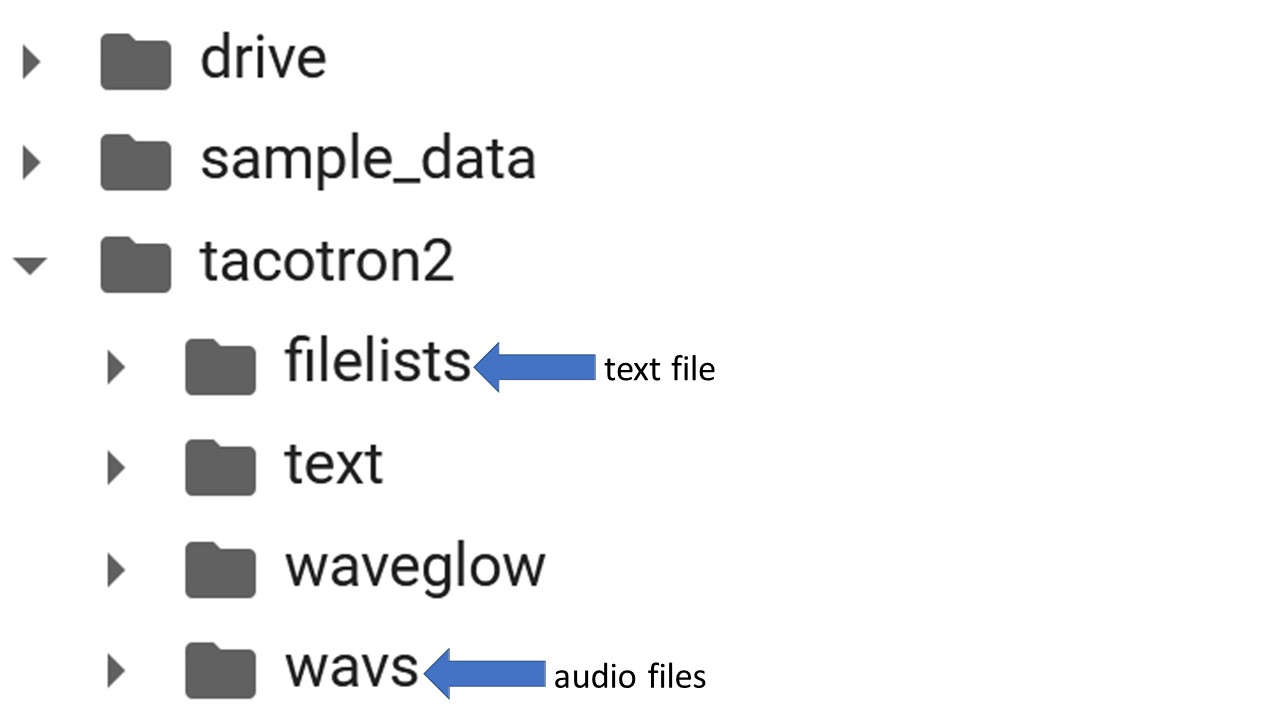

# 准备模型

## 测试speaker_encoder


In [ ]:
!python ./data_preprocess.py

In [ ]:
# speaker_embedding的训练
%cd /content/Speaker_verification
import os
import random
import time
import torch
from torch.utils.data import DataLoader, Dataset

from hparam import hparam as hp
from speech_embedder_net import SpeechEmbedder, GE2ELoss, get_centroids, get_cossim
from utils import mfccs_and_spec

import librosa
import soundfile
import glob

class SpeakerDataset(Dataset):
    def __init__(self):
        self.path = train_path
        self.utterance_number = utterance_number
        self.speakers = glob.glob(os.path.dirname(self.path)) # 返回一个列表,里面存的是到音频文件的路径
        random.shuffle(self.speakers) 
        
    def __len__(self):
        return len(self.speakers)

    def __getitem__(self, idx):
        speaker = self.speakers[idx]
        wav_files = glob.glob(speaker+'/*.flac')
        random.shuffle(wav_files) # 获得该说话人的每一句音频
        if (utterance_number != -1): # 若指定了取的音频数
          wav_files = wav_files[0:self.utterance_number]
        
        mel_dbs = []
        for f in wav_files:
            _, mel_db, _ = mfccs_and_spec(f, wav_process = True)
            mel_dbs.append(mel_db)
        return torch.Tensor(mel_dbs)

def train():
    device = torch.device('cuda')
    
    train_dataset = SpeakerDataset()

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, drop_last=True) 
    
    embedder_net = SpeechEmbedder().to(device)
    # 是否加载之前训练过的模型
    if train_restore:
        embedder_net.load_state_dict(torch.load(model_path))

    ge2e_loss = GE2ELoss(device)

    optimizer = torch.optim.SGD([
                    {'params': embedder_net.parameters()},
                    {'params': ge2e_loss.parameters()}
                ], lr=hp.train.lr)
    
    os.makedirs(checkpoint_dir, exist_ok=True)
    
    embedder_net.train()
    iteration = 0

    for e in range(train_epochs):
        total_loss = 0
        for batch_id, mel_db_batch in enumerate(train_loader): 
            mel_db_batch = mel_db_batch.to(device)
            
            mel_db_batch = torch.reshape(mel_db_batch, (hp.train.N*hp.train.M, mel_db_batch.size(2), mel_db_batch.size(3)))
            perm = random.sample(range(0, hp.train.N*hp.train.M), hp.train.N*hp.train.M)
            unperm = list(perm)
            for i,j in enumerate(perm):
                unperm[j] = i
            mel_db_batch = mel_db_batch[perm]
            #gradient accumulates
            optimizer.zero_grad()
            
            embeddings = embedder_net(mel_db_batch)
            embeddings = embeddings[unperm]
            embeddings = torch.reshape(embeddings, (hp.train.N, hp.train.M, embeddings.size(1)))
            
            #get loss, call backward, step optimizer
            loss = ge2e_loss(embeddings) #wants (Speaker, Utterances, embedding)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(embedder_net.parameters(), 3.0)
            torch.nn.utils.clip_grad_norm_(ge2e_loss.parameters(), 1.0)
            optimizer.step()
            
            total_loss = total_loss + loss
            iteration += 1
            if (batch_id + 1) % hp.train.log_interval == 0:
                mesg = "{0}\tEpoch:{1}[{2}/{3}],Iteration:{4}\tLoss:{5:.4f}\tTLoss:{6:.4f}\t\n".format(time.ctime(), e+1,
                        batch_id+1, len(train_dataset)//hp.train.N, iteration,loss, total_loss / (batch_id + 1))
                print(mesg)
                if hp.train.log_file is not None:
                    with open(hp.train.log_file,'a') as f:
                        f.write(mesg)
                    
        if checkpoint_dir is not None and (e + 1) % checkpoint_interval == 0:
            embedder_net.eval().cpu()
            ckpt_model_filename = "ckpt_epoch_" + str(e+1) + "_batch_id_" + str(batch_id+1) + ".pth"
            ckpt_model_path = os.path.join(hp.train.checkpoint_dir, ckpt_model_filename)
            torch.save(embedder_net.state_dict(), ckpt_model_path)
            embedder_net.to(device).train()

    #save model
    embedder_net.eval().cpu()
    save_model_filename = "final_epoch_" + str(e + 1) + "_batch_id_" + str(batch_id + 1) + ".model"
    save_model_path = os.path.join(hp.train.checkpoint_dir, save_model_filename)
    torch.save(embedder_net.state_dict(), save_model_path)
    
    print("\nDone, trained model saved at", save_model_path)

/content/Speaker_verification


In [ ]:
# 预处理，将.flac转化为.wav
%cd /content
preprocess_Libri()

In [ ]:
# 一些参数
device = 'cuda'
train_path = './LibriSpeech/train-clean-100/*/*/*.flac' # 训练集数据
utterance_number = 5 # 每个说话人取几句话，设小了便于训练
batch_size = 5
num_workers = 0
checkpoint_interval = 10 # 在多少个epoch后存一个checkpoint
checkpoint_dir = './speech_id_checkpoint' # 存checkpoint的路径
# 需要注意的参数
train_restore = False # 是否加载之前训练的模型
model_path = './model.model' # 加载模型的路径
train_epochs = 50 
#训练
%cd /content/Speaker_verification
# train()

/content/Speaker_verification


In [ ]:
#@title 准备日志模块，输出调试信息
%cd /content
import logging
logging.basicConfig(level=logging.DEBUG #设置日志输出格式
                ,filename="experiment1.log" #log日志输出的文件位置和文件名
                ,format="%(asctime)s-%(levelname)s: %(message)s" #日志输出的格式
                  # -8表示占位符，让输出左对齐，输出长度都为8位
                ,datefmt="%Y-%m-%d %H:%M:%S" #时间输出的格式
                ,force=True
                )
# 使用logging.debug就可以输出调试信息了，直接print到终端其它输出多了可能不好找
logging.debug("debug!")

%cd /content/tacotron2

/content
/content/tacotron2


In [ ]:
# speaker_encoder的package
!pip install resemblyzer

In [ ]:
# 训练模型的代码
%matplotlib inline
import os
import time
import argparse
import math
from numpy import finfo

import torch
from distributed import apply_gradient_allreduce
import torch.distributed as dist
from torch.utils.data.distributed import DistributedSampler
from torch.utils.data import DataLoader

from model import Tacotron2
from data_utils import TextMelLoader, TextMelCollate, PPGMelLoader
from loss_function import Tacotron2Loss
from logger import Tacotron2Logger
from hparams import create_hparams
 
import random
import numpy as np

import layers
from utils import load_wav_to_torch, load_filepaths_and_text
from text import text_to_sequence # 在我导入的时候，是不是会自动调用text文件夹中的__init__.py？
from math import e
#from tqdm import tqdm # Terminal
#from tqdm import tqdm_notebook as tqdm # Legacy Notebook TQDM
from tqdm.notebook import tqdm # Modern Notebook TQDM # tqdm可以实现进度条的显示
from distutils.dir_util import copy_tree
import matplotlib.pylab as plt

logging.basicConfig(filename='log.txt',
            format = '%(asctime)s - %(name)s - %(levelname)s - %(message)s-%(funcName)s',
            level=logging.ERROR)

def download_from_google_drive(file_id, file_name):
  # download a file from the Google Drive link
  !rm -f ./cookie
  !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id={file_id}" > /dev/null
  confirm_text = !awk '/download/ {print $NF}' ./cookie
  confirm_text = confirm_text[0]
  !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={confirm_text}&id={file_id}" -o {file_name}

def create_mels():
    print("Generating Mels")
    stft = layers.TacotronSTFT(
                hparams.filter_length, hparams.hop_length, hparams.win_length,
                hparams.n_mel_channels, hparams.sampling_rate, hparams.mel_fmin,
                hparams.mel_fmax)
    def save_mel(filename):
        audio, sampling_rate = load_wav_to_torch(filename)
        if sampling_rate != stft.sampling_rate:
            raise ValueError("{} {} SR doesn't match target {} SR".format(filename, 
                sampling_rate, stft.sampling_rate))
        audio_norm = audio / hparams.max_wav_value
        audio_norm = audio_norm.unsqueeze(0)
        audio_norm = torch.autograd.Variable(audio_norm, requires_grad=False)
        melspec = stft.mel_spectrogram(audio_norm)
        melspec = torch.squeeze(melspec, 0).cpu().numpy()
        np.save(filename.replace('.wav', ''), melspec)

    import glob
    wavs = glob.glob('wavs/*.wav')
    for i in tqdm(wavs):
        save_mel(i)


def reduce_tensor(tensor, n_gpus):
    rt = tensor.clone()
    dist.all_reduce(rt, op=dist.reduce_op.SUM)
    rt /= n_gpus
    return rt


def init_distributed(hparams, n_gpus, rank, group_name):
    assert torch.cuda.is_available(), "Distributed mode requires CUDA."
    print("Initializing Distributed")

    # Set cuda device so everything is done on the right GPU.
    torch.cuda.set_device(rank % torch.cuda.device_count())

    # Initialize distributed communication
    dist.init_process_group(
        backend=hparams.dist_backend, init_method=hparams.dist_url,
        world_size=n_gpus, rank=rank, group_name=group_name)

    print("Done initializing distributed")


def prepare_dataloaders(hparams):
    # Get data, data loaders and collate function ready
    
    # 在data_utils中定义的类,这个类是继承的torch.utils.data.Dataset
    # 它的作用是，读取"音频，文本"对，将文本信息转化为sequence，计算音频文件的梅尔谱
    trainset = TextMelLoader(hparams.training_files, hparams) 
    valset = TextMelLoader(hparams.validation_files, hparams)
    # 用于整理sequence
    collate_fn = TextMelCollate(hparams.n_frames_per_step)

    # TODO
    trainset = PPGMelLoader(hparams.training_files, hparams)
    valset = PPGMelLoader(hparams.validation_files, hparams)
    # 我不确定PPG需不需要collate

    if hparams.distributed_run:
        train_sampler = DistributedSampler(trainset)
        shuffle = False
    else:
        train_sampler = None
        shuffle = True

    # 调用pytorch的DataLoader
    train_loader = DataLoader(trainset, num_workers=1, # 这个参数是指几线程读取数据
                shuffle=shuffle, sampler=train_sampler,
                batch_size=hparams.batch_size, pin_memory=False, drop_last=True, collate_fn=collate_fn)
    
    return train_loader, valset, collate_fn


def prepare_directories_and_logger(output_directory, log_directory, rank):
    # 准备输出路径 和 输出调试信息的工具
    if rank == 0:
        logging.debug("在prepare_directories_and_logger中，rank=0")
        if not os.path.isdir(output_directory): # 检查是否有输出路径，没有就创建一个。（前面应该创建过了）
            logging.debug("没有output_directory，创建一个")
            os.makedirs(output_directory)
            os.chmod(output_directory, 0o775) # 反正这步就是设置权限，不懂linux。775，第一个7指文件所有者可读可写可执行，第二个7指与文件所有者同属一个用户组的其他用户可读可执行，第三个5指其它用户组可读可执行
        logger = Tacotron2Logger(os.path.join(output_directory, log_directory)) # 在 logger.py中定义的类
        # 这个类继承了torch.utils.tensorboard中的SummaryWriter类，顾名思义是记录信息的
    else:
        logging.debug("在prepare_directories_and_logger中，rank!=0")
        logger = None
    return logger


def load_model(hparams):
    model = Tacotron2(hparams).cuda()
    if hparams.fp16_run:
      logging.debug("在load_model()中，启用fp16_run")
      model.decoder.attention_layer.score_mask_value = finfo('float16').min

    if hparams.distributed_run:
      logging.debug("在load_model()中，启用distributed_run")
      model = apply_gradient_allreduce(model)

    return model


def warm_start_model(checkpoint_path, model, ignore_layers):
    # 这个函数暂时没看，因为还没用上warm_start
    assert os.path.isfile(checkpoint_path)
    print("Warm starting model from checkpoint '{}'".format(checkpoint_path))
    checkpoint_dict = torch.load(checkpoint_path, map_location='cpu')
    model_dict = checkpoint_dict['state_dict']
    if len(ignore_layers) > 0:
        model_dict = {k: v for k, v in model_dict.items()
                      if k not in ignore_layers}
        dummy_dict = model.state_dict()
        dummy_dict.update(model_dict)
        model_dict = dummy_dict
    model.load_state_dict(model_dict)
    return model


def load_checkpoint(checkpoint_path, model, optimizer):
    assert os.path.isfile(checkpoint_path) # 打开对应路径下的模型
    print("Loading checkpoint '{}'".format(checkpoint_path)) # 调试信息：Loading checkpoint '/content/drive/MyDrive/colab/outdir/test'

    # torch.load()用来加载torch.save()保存的文件
    checkpoint_dict = torch.load(checkpoint_path, map_location='cpu')

    # 继承自torch.nn的方法，用于将预训练的参数权重加载到新的模型之中
    logging.debug(type(checkpoint_dict['state_dict']))
    model.load_state_dict(checkpoint_dict['state_dict']) # 不懂这步checkpoint_dict['state_dict']是什么意思
    # 大概是把一些预训练的参数加到model上吧
    optimizer.load_state_dict(checkpoint_dict['optimizer'])
    learning_rate = checkpoint_dict['learning_rate']
    iteration = checkpoint_dict['iteration'] # 这步就是返回上次训练到哪个iteration了
    # 主要不懂这个checkpoint的保存形式，感觉好像有一些键值对？

    print("Loaded checkpoint '{}' from iteration {}" .format( # 调试信息：Loaded checkpoint '/content/drive/MyDrive/colab/outdir/test' from iteration 17
        checkpoint_path, iteration))
    return model, optimizer, learning_rate, iteration


def save_checkpoint(model, optimizer, learning_rate, iteration, filepath):
    print("Saving model and optimizer state at iteration {} to {}".format(
        iteration, filepath))
    try:
        torch.save({'iteration': iteration,
                'state_dict': model.state_dict(),
                'optimizer': optimizer.state_dict(),
                'learning_rate': learning_rate}, filepath)
    except KeyboardInterrupt:
        print("interrupt received while saving, waiting for save to complete.")
        torch.save({'iteration': iteration,'state_dict': model.state_dict(),'optimizer': optimizer.state_dict(),'learning_rate': learning_rate}, filepath)
    print("Model Saved")

def plot_alignment(alignment, info=None):
    %matplotlib inline
    fig, ax = plt.subplots(figsize=(int(alignment_graph_width/100), int(alignment_graph_height/100)))
    im = ax.imshow(alignment, cmap='inferno', aspect='auto', origin='lower',
                   interpolation='none')
    ax.autoscale(enable=True, axis="y", tight=True)
    fig.colorbar(im, ax=ax)
    xlabel = 'Decoder timestep'
    if info is not None:
        xlabel += '\n\n' + info
    plt.xlabel(xlabel)
    plt.ylabel('Encoder timestep')
    plt.tight_layout()
    fig.canvas.draw()
    plt.show()

def validate(model, criterion, valset, iteration, batch_size, n_gpus,
             collate_fn, logger, distributed_run, rank, epoch, start_eposh, learning_rate):
    """Handles all the validation scoring and printing"""
    model.eval()
    with torch.no_grad():
        val_sampler = DistributedSampler(valset) if distributed_run else None
        val_loader = DataLoader(valset, sampler=val_sampler, num_workers=1,
                                shuffle=False, batch_size=batch_size,
                                pin_memory=False, collate_fn=collate_fn)

        val_loss = 0.0
        for i, batch in enumerate(val_loader):
            x, y = model.parse_batch(batch)
            y_pred = model(x)
            loss = criterion(y_pred, y)
            if distributed_run:
                reduced_val_loss = reduce_tensor(loss.data, n_gpus).item()
            else:
                reduced_val_loss = loss.item()
            val_loss += reduced_val_loss
        val_loss = val_loss / (i + 1)

    model.train()
    if rank == 0:
        print("Epoch: {} Validation loss {}: {:9f}  Time: {:.1f}m LR: {:.6f}".format(epoch, iteration, val_loss,(time.perf_counter()-start_eposh)/60, learning_rate))
        logger.log_validation(val_loss, model, y, y_pred, iteration)
        if hparams.show_alignments:
            %matplotlib inline
            _, mel_outputs, gate_outputs, alignments = y_pred
            idx = random.randint(0, alignments.size(0) - 1)
            plot_alignment(alignments[idx].data.cpu().numpy().T)

def train(output_directory, log_directory, checkpoint_path, warm_start, n_gpus,
          rank, group_name, hparams, log_directory2):
    """Training and validation logging results to tensorboard and stdout

    Params
    ------
    output_directory (string): directory to save checkpoints
    log_directory (string) directory to save tensorboard logs
    checkpoint_path(string): checkpoint path
    n_gpus (int): number of gpus
    rank (int): rank of current gpu
    hparams (object): comma separated list of "name=value" pairs.
    """
    logging.debug("----------------")
    logging.debug("start trainning")
    logging.debug("checkpoint_path = %s", checkpoint_path)
    if hparams.distributed_run:
        init_distributed(hparams, n_gpus, rank, group_name)

    torch.manual_seed(hparams.seed)
    torch.cuda.manual_seed(hparams.seed)

    logging.debug('调用load_model函数')
    model = load_model(hparams) # model是model.py中的Tacotron2类

    learning_rate = hparams.learning_rate
    logging.debug('learning_rate = %d',learning_rate)

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,
                                 weight_decay=hparams.weight_decay)

    # if hparams.fp16_run: # 未开启
    #   from apex import amp
    #   model, optimizer = amp.initialize(
    #     model, optimizer, opt_level='O2')

    # if hparams.distributed_run: # 未开启
    #     model = apply_gradient_allreduce(model)

    criterion = Tacotron2Loss() # 在loss_function.py中的一个类
    # 也是继承了torch.nn
    # 定义了一个forward函数，之后用到再看
 
    logger = prepare_directories_and_logger(output_directory, log_directory, rank) # 调用了上文中定义的函数，准备输出路径和输出调试信息的工具，不重要

    train_loader, valset, collate_fn = prepare_dataloaders(hparams)

    # Load checkpoint if one exists
    iteration = 0
    epoch_offset = 0
    logging.debug('尝试读取checkpoint')
    logging.debug('checkpoint_path = %s', checkpoint_path)
    if checkpoint_path is not None and os.path.isfile(checkpoint_path):
        logging.debug("读取了checkpoint")
        if warm_start:
            logging.debug("启动warm_start")
            model = warm_start_model(
                checkpoint_path, model, hparams.ignore_layers)
        else:
            logging.debug("没有启动warm_start")
            model, optimizer, _learning_rate, iteration = load_checkpoint( # 调用上文定义的load_checkpoint函数
                checkpoint_path, model, optimizer)
            if hparams.use_saved_learning_rate:
                logging.debug("选择use_saved_learning_rate")
                learning_rate = _learning_rate
            iteration += 1  # 从上次训练结束时的iteration + 1开始
            epoch_offset = max(0, int(iteration / len(train_loader))) # len(train_loader) = batches的数量 ； 好理解，iteration是训练一个bath_size，epoch是所有数据训练一遍
    else:
      # 如果不在checkpoint_path指定预训练模型的话，程序就会走这里，调用默认的预训练模型tacotron2_statedict.pt，也默认启动warm_start
      os.path.isfile("tacotron2_statedict.pt")
      model = warm_start_model("tacotron2_statedict.pt", model, hparams.ignore_layers)
      # download LJSpeech pretrained model if no checkpoint already exists
    
    start_eposh = time.perf_counter() # 这个函数大概可以看作一个高精度的计时器
    learning_rate = 0.0
    model.train() # 将当前模块设置成训练模式.
    is_overflow = False
    # ================ MAIN TRAINNIG LOOP! ===================
    for epoch in tqdm(range(epoch_offset, hparams.epochs)): # hparams.epochs就是训练的epoch次数，就是接着上次训练剩余的次数继续。
        # tqdm是展示进度条的库
        # 上面这个tqdm(range)也比较好理解，比如说是tqdm(range(4,50))，那训练到epoch = 27时这个进度条就走了一半了
        print("\nStarting Epoch: {} Iteration: {}".format(epoch, iteration))
        start_eposh = time.perf_counter() # eposh is russian, not a typo

        # 这个enumerate(train_loader)比较重要，返回的i是batch的序号，batch里包含两个信息，一个是训练数据，一个是label。
        for i, batch in tqdm(enumerate(train_loader), total=len(train_loader)): 
            start = time.perf_counter() # 初始化计时器为0
            # 反正是在调整学习率
            if iteration < hparams.decay_start: learning_rate = hparams.A_ # 这个decay_start是什么意思？？一开始的hparams.A设的很小，一开始进去的数据热热身？
            else: iteration_adjusted = iteration - hparams.decay_start; learning_rate = (hparams.A_*(e**(-iteration_adjusted/hparams.B_))) + hparams.C_


            learning_rate = max(hparams.min_learning_rate, learning_rate) # output the largest number
            logging.debug("epoch = %d", epoch)
            logging.debug("batch_num = %d", i)
            logging.debug("learning_rate = %f", learning_rate)

            # 这步不懂
            for param_group in optimizer.param_groups:
                param_group['lr'] = learning_rate


            model.zero_grad() # 将模型的所有参数的梯度清零.
            x, y = model.parse_batch(batch)
            y_pred = model(x)
            
            print("断点1")
            logging.debug("断点1")

            loss = criterion(y_pred, y)
            if hparams.distributed_run: # 不启用
                reduced_loss = reduce_tensor(loss.data, n_gpus).item()
            else:
                reduced_loss = loss.item()
            if hparams.fp16_run: # 不启用
                with amp.scale_loss(loss, optimizer) as scaled_loss:
                    scaled_loss.backward()
            else:
                #走这里
                loss.backward()

            if hparams.fp16_run:
                grad_norm = torch.nn.utils.clip_grad_norm_(
                    amp.master_params(optimizer), hparams.grad_clip_thresh)
                is_overflow = math.isnan(grad_norm)
            else:
                grad_norm = torch.nn.utils.clip_grad_norm_(
                    model.parameters(), hparams.grad_clip_thresh)

            optimizer.step()
            print("断点2")
            logging.debug("断点2")
            if not is_overflow and rank == 0:
                duration = time.perf_counter() - start
                logger.log_training(
                    reduced_loss, grad_norm, learning_rate, duration, iteration)
                #print("Batch {} loss {:.6f} Grad Norm {:.6f} Time {:.6f}".format(iteration, reduced_loss, grad_norm, duration), end='\r', flush=True)

            iteration += 1
        print("断点3")
        logging.debug("断点3")
        validate(model, criterion, valset, iteration,
                 hparams.batch_size, n_gpus, collate_fn, logger,
                 hparams.distributed_run, rank, epoch, start_eposh, learning_rate)
        save_checkpoint(model, optimizer, learning_rate, iteration, checkpoint_path)
        if log_directory2 != None:
            copy_tree(log_directory, log_directory2)
def check_dataset(hparams):
    from utils import load_wav_to_torch, load_filepaths_and_text
    import os
    import numpy as np
    def check_arr(filelist_arr):
        for i, file in enumerate(filelist_arr):
            if len(file) > 2:
                print("|".join(file), "\nhas multiple '|', this may not be an error.")
            if hparams.load_mel_from_disk and '.wav' in file[0]:
                print("[WARNING]", file[0], " in filelist while expecting .npy .")
            else:
                if not hparams.load_mel_from_disk and '.npy' in file[0]:
                    print("[WARNING]", file[0], " in filelist while expecting .wav .")
            if (not os.path.exists(file[0])):
                print("|".join(file), "\n[WARNING] does not exist.")
            if len(file[1]) < 3:
                print("|".join(file), "\n[info] has no/very little text.")
            if not ((file[1].strip())[-1] in r"!?,.;:"):
                print("|".join(file), "\n[info] has no ending punctuation.")
            mel_length = 1
            if hparams.load_mel_from_disk and '.npy' in file[0]:
                melspec = torch.from_numpy(np.load(file[0], allow_pickle=True))
                mel_length = melspec.shape[1]
            if mel_length == 0:
                print("|".join(file), "\n[WARNING] has 0 duration.")
    print("Checking Training Files")
    audiopaths_and_text = load_filepaths_and_text(hparams.training_files) # get split lines from training_files text file.
    check_arr(audiopaths_and_text)
    print("Checking Validation Files")
    audiopaths_and_text = load_filepaths_and_text(hparams.validation_files) # get split lines from validation_files text file.
    check_arr(audiopaths_and_text)
    print("Finished Checking")

warm_start=False #sorry about that
n_gpus=1
rank=0
group_name=None

# ---- 这是定义的默认参数，可以不用管 ----
hparams = create_hparams()
model_filename = 'current_model'
hparams.training_files = "filelists/clipper_train_filelist.txt"
hparams.validation_files = "filelists/clipper_val_filelist.txt"
#hparams.use_mmi=True,          # not used in this notebook
#hparams.use_gaf=True,          # not used in this notebook
#hparams.max_gaf=0.5,           # not used in this notebook
#hparams.drop_frame_rate = 0.2  # not used in this notebook
hparams.p_attention_dropout=0.1
hparams.p_decoder_dropout=0.1
hparams.decay_start = 15000
hparams.A_ = 5e-4
hparams.B_ = 8000
hparams.C_ = 0
hparams.min_learning_rate = 1e-5
generate_mels = True
hparams.show_alignments = True
alignment_graph_height = 600
alignment_graph_width = 1000
hparams.batch_size = 32
hparams.load_mel_from_disk = True
hparams.ignore_layers = []
hparams.epochs = 10000

torch.backends.cudnn.enabled = hparams.cudnn_enabled
torch.backends.cudnn.benchmark = hparams.cudnn_benchmark
output_directory = '/content/drive/MyDrive/colab/outdir' # Location to save Checkpoints
log_directory = '/content/tacotron2/logs' # Location to save Log files locally
log_directory2 = '/content/drive/MyDrive/colab/logs' # Location to copy log files (done at the end of each epoch to cut down on I/O)e
checkpoint_path = output_directory+(r'/')+model_filename


In [ ]:
#@title 给你的模型取名（写字母数字）
model_filename = "test" #@param {type:"string"}

In [ ]:
#@title 添加之前训练的模型到输出文件夹

#@markdown 如果之前训练过**同名**模型: 在Google云端硬盘分享模型，设置为任何人可见，然后把share id放在这里即可（参考gdown用法）

#@markdown 如果第一次训练      : 直接跳过
os.chdir("outdir")
# ! gdown --id 
os.chdir("..")

In [ ]:
#@title 设置参数

#@markdown **这两个参数是最重要的。**

#@markdown 这个参数控制模型训练得多快。**不要设置太大，否则显卡会炸。**如果数据集比较大，设置在30左右比较好。

#@markdown 如果数据集里音频文件的数量和这个参数差不多，训练会失败。

hparams.batch_size = 4 #@param {type:"integer"}

#@markdown 这个参数控制训练的次数
hparams.epochs = 1000 #@param {type:"integer"}

#The rest aren't that important
hparams.p_attention_dropout=0.1
hparams.p_decoder_dropout=0.1
hparams.decay_start = 15000 # wait till decay_start to start decaying learning rate
hparams.A_ = 5e-4      # Start/Max Learning Rate
hparams.B_ = 8000      # Decay Rate
hparams.C_ = 0        # Shift learning rate equation by this value
hparams.min_learning_rate = 1e-5    # Min Learning Rate
generate_mels = True # Don't change
hparams.show_alignments = True
alignment_graph_height = 600
alignment_graph_width = 1000
hparams.load_mel_from_disk = True
hparams.ignore_layers = [] # Layers to reset (None by default, other than foreign languages this param can be ignored)

torch.backends.cudnn.enabled = hparams.cudnn_enabled
torch.backends.cudnn.benchmark = hparams.cudnn_benchmark
output_directory = '/content/drive/MyDrive/colab/outdir' # Location to save Checkpoints
log_directory = '/content/tacotron2/logs' # Location to save Log files locally
log_directory2 = '/content/drive/MyDrive/colab/logs' # Location to copy log files (done at the end of each epoch to cut down on I/O)
checkpoint_path = output_directory+(r'/')+model_filename

In [ ]:
#@title 数据集文件列表
#@markdown 如果要求不高，两个列表用同一个文件即可

#@markdown 训练集文件列表
training_files_name = "list.txt" #@param {type:"string"}
#@markdown 验证集文件列表
validation_files_name = "list.txt" #@param {type:"string"}
#@markdown 预处理文本的cleaner

hparams_prefix = "/content/tacotron2/filelists/"
text_cleaner='japanese_phrase_cleaners' #@param {type:"string"}
text_cleaners=[text_cleaner]
#@markdown ### 各种cleaner的效果示例
#@markdown ### 1. 'japanese_cleaners'
#@markdown #### 处理前
#@markdown 何かあったらいつでも話して下さい。学院のことじゃなく、私事に関することでも何でも
#@markdown #### 处理后
#@markdown nanikaacltaraitsudemohanashItekudasai.gakuiNnokotojanaku,shijinikaNsurukotodemonanidemo.
#@markdown ### 2. 'japanese_tokenization_cleaners'
#@markdown #### 处理前
#@markdown 何かあったらいつでも話して下さい。学院のことじゃなく、私事に関することでも何でも
#@markdown #### 处理后
#@markdown nani ka acl tara itsu demo hanashi te kudasai. gakuiN no koto ja naku, shiji nikaNsuru koto de mo naNdemo.
#@markdown ### 3. 'japanese_accent_cleaners'
#@markdown #### 处理前
#@markdown 何かあったらいつでも話して下さい。学院のことじゃなく、私事に関することでも何でも
#@markdown #### 处理后
#@markdown :na)nika a)cltara i)tsudemo ha(na)shIte ku(dasa)i.:ga(kuiNno ko(to)janaku,:shi)jini ka(Nsu)ru ko(to)demo na)nidemo.
#@markdown ### 4. 'japanese_phrase_cleaners'
#@markdown #### 处理前
#@markdown 何かあったらいつでも話して下さい。学院のことじゃなく、私事に関することでも何でも
#@markdown #### 处理后
#@markdown nanika acltara itsudemo hanashIte kudasai. gakuiNno kotojanaku, shijini kaNsuru kotodemo nanidemo.

training_files = hparams_prefix + training_files_name
validation_files = hparams_prefix + validation_files_name

hparams.training_files = training_files
hparams.validation_files = validation_files
hparams.text_cleaners = text_cleaners

In [ ]:
#@title 生成MEL谱
%cd /content/tacotron2
# ---- Replace .wav with .npy in filelists ----
!sed -i -- 's,.wav|,.npy|,g' filelists/*.txt
# ---- Replace .wav with .npy in filelists ----
if generate_mels:
    create_mels()

In [ ]:
#@title 检查数据集
#@markdown 没有error就算成功
check_dataset(hparams)

Checking Training Files
meian/meian_0000.npy|この前探った時は、途中に瘢痕の隆起があったので、ついそこが行きどまりだとばかり思って、ああ云ったんですが、 
[info] has no ending punctuation.
meian/meian_0001.npy|今日疎通を好くするために、そいつをがりがり掻き落して見ると、まだ奥があるんです」 
[info] has no ending punctuation.
meian/meian_0002.npy|津田の顔には苦笑の裡に淡く盛り上げられた失望の色が見えた。医者は白いだぶだぶした上着の前に 
[info] has no ending punctuation.
meian/meian_0003.npy|両手を組み合わせたまま、ちょっと首を傾けた。その様子が「御気の毒ですが 
[info] has no ending punctuation.
meian/meian_0004.npy|津田は無言のまま帯を締め直して、椅子の背に投げ掛けられた袴を取り上げながらまた医者の方を向いた。 
[info] has no ending punctuation.
meian/meian_0005.npy|「腸まで続いているとすると、癒りっこないんですか」「そんな事はありません」 
[info] has no ending punctuation.
meian/meian_0006.npy|医者は活溌にまた無雑作に津田の言葉を否定した。併せて彼の気分をも否定するごとくに。 
[info] has no ending punctuation.
meian/meian_0007.npy|「ただ今までのように穴の掃除ばかりしていては駄目なんです。それじゃいつまで経っても肉の上りこはないから、 
[info] has no ending punctuation.
meian/meian_0008.npy|「切開です。切開して穴と腸といっしょにしてしまうんです。すると 
[info] has no ending punctuation.
meian/meian_0009.npy|天然自然割かれた面の両側が癒着して来ますから、まあ本式に癒るようになるんです」 
[info] has no endin

#训练

In [ ]:
print('FP16 Run:', hparams.fp16_run)
print('Dynamic Loss Scaling:', hparams.dynamic_loss_scaling)
print('Distributed Run:', hparams.distributed_run)
print('cuDNN Enabled:', hparams.cudnn_enabled)
print('cuDNN Benchmark:', hparams.cudnn_benchmark)

/content/tacotron2
Loading checkpoint '/content/drive/MyDrive/colab/outdir/test'
Loaded checkpoint '/content/drive/MyDrive/colab/outdir/test' from iteration 13


  0%|          | 0/993 [00:00<?, ?it/s]


Starting Epoch: 7 Iteration: 14
执行了TextMelLoader的__getitem__
meian/meian_0005.npy
「腸まで続いているとすると、癒りっこないんですか」「そんな事はありません」
<class 'NoneType'>


  0%|          | 0/2 [00:00<?, ?it/s]

_symbols_to_sequence = %d [11, 40, 45, 52, 52, 50, 38, 41, 42, 11, 57, 56, 58, 63, 58, 46, 57, 42, 11, 46, 55, 58, 57, 52, 11, 56, 58, 55, 58, 57, 52, 6, 11, 46, 42, 55, 46, 40, 49, 11, 48, 52, 51, 38, 46, 11, 25, 41, 42, 56, 32, 48, 38, 11, 56, 52, 25, 51, 38, 11, 48, 52, 57, 52, 60, 38, 38, 55, 46, 50, 38, 56, 42, 25]
在text_to_sequence这步，sequence = 
[11, 40, 45, 52, 52, 50, 38, 41, 42, 11, 57, 56, 58, 63, 58, 46, 57, 42, 11, 46, 55, 58, 57, 52, 11, 56, 58, 55, 58, 57, 52, 6, 11, 46, 42, 55, 46, 40, 49, 11, 48, 52, 51, 38, 46, 11, 25, 41, 42, 56, 32, 48, 38, 11, 56, 52, 25, 51, 38, 11, 48, 52, 57, 52, 60, 38, 38, 55, 46, 50, 38, 56, 42, 25]
tensor([11, 40, 45, 52, 52, 50, 38, 41, 42, 11, 57, 56, 58, 63, 58, 46, 57, 42,
        11, 46, 55, 58, 57, 52, 11, 56, 58, 55, 58, 57, 52,  6, 11, 46, 42, 55,
        46, 40, 49, 11, 48, 52, 51, 38, 46, 11, 25, 41, 42, 56, 32, 48, 38, 11,
        56, 52, 25, 51, 38, 11, 48, 52, 57, 52, 60, 38, 38, 55, 46, 50, 38, 56,
        42, 25], dtype=torch.i

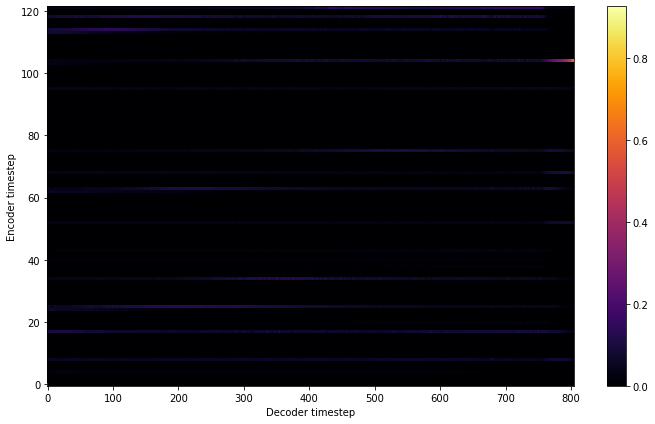

Saving model and optimizer state at iteration 16 to /content/drive/MyDrive/colab/outdir/test
Model Saved

Starting Epoch: 8 Iteration: 16
执行了TextMelLoader的__getitem__


  0%|          | 0/2 [00:00<?, ?it/s]

meian/meian_0000.npy
この前探った時は、途中に瘢痕の隆起があったので、ついそこが行きどまりだとばかり思って、ああ云ったんですが、
<class 'NoneType'>
_symbols_to_sequence = %d [48, 52, 51, 52, 11, 50, 38, 42, 11, 56, 38, 44, 58, 40, 49, 57, 38, 11, 57, 52, 48, 46, 60, 38, 6, 11, 57, 52, 40, 45, 58, 58, 51, 46, 11, 45, 38, 25, 48, 52, 25, 51, 52, 11, 55, 62, 58, 58, 48, 46, 44, 38, 11, 38, 40, 49, 57, 38, 51, 52, 41, 42, 6, 11, 57, 56, 58, 46, 11, 56, 52, 48, 52, 44, 38, 11, 46, 48, 46, 41, 52, 50, 38, 55, 46, 41, 38, 57, 52, 39, 38, 48, 38, 55, 46, 11, 52, 50, 52, 40, 49, 57, 42, 6, 11, 38, 38, 62, 58, 40, 49, 57, 38, 11, 25, 41, 42, 56, 32, 44, 38, 6]
在text_to_sequence这步，sequence = 
[48, 52, 51, 52, 11, 50, 38, 42, 11, 56, 38, 44, 58, 40, 49, 57, 38, 11, 57, 52, 48, 46, 60, 38, 6, 11, 57, 52, 40, 45, 58, 58, 51, 46, 11, 45, 38, 25, 48, 52, 25, 51, 52, 11, 55, 62, 58, 58, 48, 46, 44, 38, 11, 38, 40, 49, 57, 38, 51, 52, 41, 42, 6, 11, 57, 56, 58, 46, 11, 56, 52, 48, 52, 44, 38, 11, 46, 48, 46, 41, 52, 50, 38, 55, 46, 41, 38, 57, 52, 39, 38, 

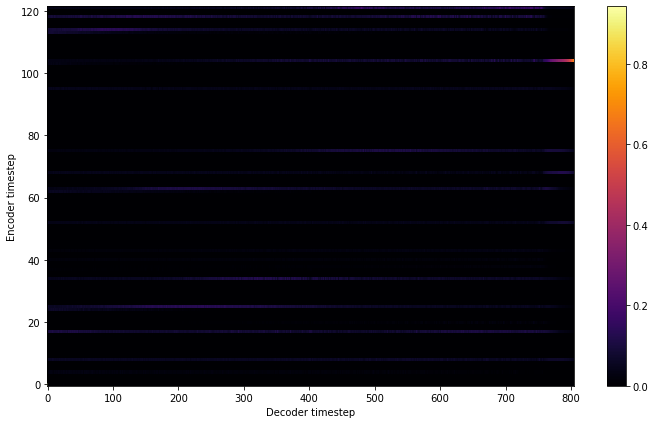

Saving model and optimizer state at iteration 18 to /content/drive/MyDrive/colab/outdir/test
Model Saved

Starting Epoch: 9 Iteration: 18


  0%|          | 0/2 [00:00<?, ?it/s]

执行了TextMelLoader的__getitem__
meian/meian_0007.npy
「ただ今までのように穴の掃除ばかりしていては駄目なんです。それじゃいつまで経っても肉の上りこはないから、
<class 'NoneType'>
_symbols_to_sequence = %d [11, 57, 38, 41, 38, 11, 46, 50, 38, 50, 38, 41, 42, 51, 52, 11, 62, 52, 52, 51, 46, 11, 38, 51, 38, 51, 52, 11, 56, 52, 52, 47, 46, 39, 38, 48, 38, 55, 46, 11, 56, 45, 20, 57, 42, 11, 46, 57, 42, 60, 38, 11, 41, 38, 50, 42, 51, 38, 11, 25, 41, 42, 56, 32, 7, 11, 56, 52, 55, 42, 47, 38, 11, 46, 57, 56, 58, 50, 38, 41, 42, 11, 57, 38, 40, 49, 57, 42, 50, 52, 11, 51, 46, 48, 58, 51, 52, 11, 58, 42, 11, 55, 46, 48, 52, 60, 38, 51, 38, 46, 48, 38, 55, 38, 6]
在text_to_sequence这步，sequence = 
[11, 57, 38, 41, 38, 11, 46, 50, 38, 50, 38, 41, 42, 51, 52, 11, 62, 52, 52, 51, 46, 11, 38, 51, 38, 51, 52, 11, 56, 52, 52, 47, 46, 39, 38, 48, 38, 55, 46, 11, 56, 45, 20, 57, 42, 11, 46, 57, 42, 60, 38, 11, 41, 38, 50, 42, 51, 38, 11, 25, 41, 42, 56, 32, 7, 11, 56, 52, 55, 42, 47, 38, 11, 46, 57, 56, 58, 50, 38, 41, 42, 11, 57, 38, 40, 49, 57, 42, 50, 52, 1

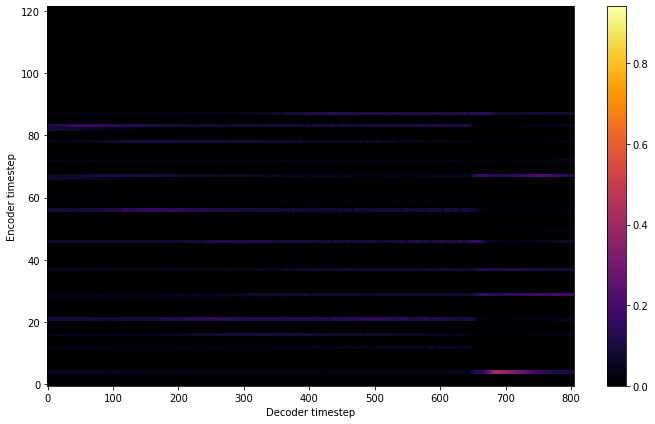

Saving model and optimizer state at iteration 20 to /content/drive/MyDrive/colab/outdir/test
Model Saved

Starting Epoch: 10 Iteration: 20


  0%|          | 0/2 [00:00<?, ?it/s]

执行了TextMelLoader的__getitem__
meian/meian_0010.npy
医者と懇意な彼は先刻診察所へ這入った時、物珍らしさに、それを覗かせて貰ったのである。
<class 'NoneType'>
_symbols_to_sequence = %d [46, 56, 45, 38, 57, 52, 11, 48, 52, 25, 46, 51, 38, 11, 48, 38, 55, 42, 60, 38, 11, 56, 42, 25, 48, 52, 48, 32, 11, 56, 45, 46, 25, 56, 38, 57, 56, 32, 56, 45, 52, 42, 11, 45, 38, 46, 46, 40, 49, 57, 38, 11, 57, 52, 48, 46, 6, 11, 50, 52, 51, 52, 50, 42, 63, 58, 55, 38, 56, 45, 46, 56, 38, 51, 46, 6, 11, 56, 52, 55, 42, 52, 11, 51, 52, 63, 52, 48, 38, 56, 42, 57, 42, 11, 50, 52, 55, 38, 40, 49, 57, 38, 11, 51, 52, 41, 42, 38, 55, 58, 7]
在text_to_sequence这步，sequence = 
[46, 56, 45, 38, 57, 52, 11, 48, 52, 25, 46, 51, 38, 11, 48, 38, 55, 42, 60, 38, 11, 56, 42, 25, 48, 52, 48, 32, 11, 56, 45, 46, 25, 56, 38, 57, 56, 32, 56, 45, 52, 42, 11, 45, 38, 46, 46, 40, 49, 57, 38, 11, 57, 52, 48, 46, 6, 11, 50, 52, 51, 52, 50, 42, 63, 58, 55, 38, 56, 45, 46, 56, 38, 51, 46, 6, 11, 56, 52, 55, 42, 52, 11, 51, 52, 63, 52, 48, 38, 56, 42, 57, 42, 11, 50, 52, 55, 3

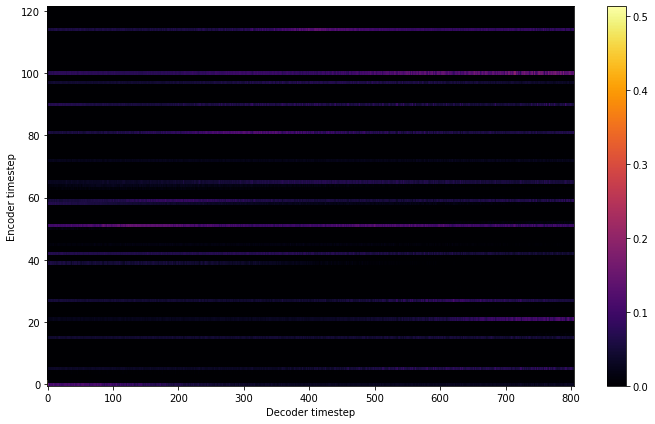

Saving model and optimizer state at iteration 22 to /content/drive/MyDrive/colab/outdir/test
Model Saved

Starting Epoch: 11 Iteration: 22
执行了TextMelLoader的__getitem__

  0%|          | 0/2 [00:00<?, ?it/s]


meian/meian_0004.npy
津田は無言のまま帯を締め直して、椅子の背に投げ掛けられた袴を取り上げながらまた医者の方を向いた。
<class 'NoneType'>
_symbols_to_sequence = %d [57, 56, 58, 41, 38, 60, 38, 11, 50, 58, 44, 52, 25, 51, 52, 11, 50, 38, 50, 38, 52, 39, 46, 52, 11, 56, 45, 46, 50, 42, 51, 38, 52, 56, 45, 20, 57, 42, 6, 11, 46, 56, 58, 51, 52, 11, 56, 42, 51, 46, 11, 51, 38, 44, 42, 48, 38, 48, 42, 55, 38, 55, 42, 57, 38, 11, 45, 38, 48, 38, 50, 38, 52, 11, 57, 52, 55, 46, 38, 44, 42, 51, 38, 44, 38, 55, 38, 11, 50, 38, 57, 38, 11, 46, 56, 45, 38, 51, 52, 11, 45, 52, 52, 52, 11, 50, 58, 46, 57, 38, 7]
在text_to_sequence这步，sequence = 
[57, 56, 58, 41, 38, 60, 38, 11, 50, 58, 44, 52, 25, 51, 52, 11, 50, 38, 50, 38, 52, 39, 46, 52, 11, 56, 45, 46, 50, 42, 51, 38, 52, 56, 45, 20, 57, 42, 6, 11, 46, 56, 58, 51, 52, 11, 56, 42, 51, 46, 11, 51, 38, 44, 42, 48, 38, 48, 42, 55, 38, 55, 42, 57, 38, 11, 45, 38, 48, 38, 50, 38, 52, 11, 57, 52, 55, 46, 38, 44, 42, 51, 38, 44, 38, 55, 38, 11, 50, 38, 57, 38, 11, 46, 56, 45, 38, 51, 52, 11, 45, 52, 5

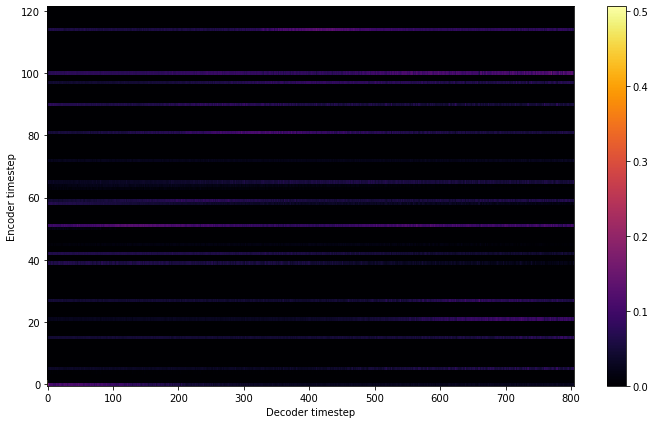

Saving model and optimizer state at iteration 24 to /content/drive/MyDrive/colab/outdir/test
Model Saved

Starting Epoch: 12 Iteration: 24
执行了TextMelLoader的__getitem__

  0%|          | 0/2 [00:00<?, ?it/s]


meian/meian_0007.npy
「ただ今までのように穴の掃除ばかりしていては駄目なんです。それじゃいつまで経っても肉の上りこはないから、
<class 'NoneType'>
_symbols_to_sequence = %d [11, 57, 38, 41, 38, 11, 46, 50, 38, 50, 38, 41, 42, 51, 52, 11, 62, 52, 52, 51, 46, 11, 38, 51, 38, 51, 52, 11, 56, 52, 52, 47, 46, 39, 38, 48, 38, 55, 46, 11, 56, 45, 20, 57, 42, 11, 46, 57, 42, 60, 38, 11, 41, 38, 50, 42, 51, 38, 11, 25, 41, 42, 56, 32, 7, 11, 56, 52, 55, 42, 47, 38, 11, 46, 57, 56, 58, 50, 38, 41, 42, 11, 57, 38, 40, 49, 57, 42, 50, 52, 11, 51, 46, 48, 58, 51, 52, 11, 58, 42, 11, 55, 46, 48, 52, 60, 38, 51, 38, 46, 48, 38, 55, 38, 6]
在text_to_sequence这步，sequence = 
[11, 57, 38, 41, 38, 11, 46, 50, 38, 50, 38, 41, 42, 51, 52, 11, 62, 52, 52, 51, 46, 11, 38, 51, 38, 51, 52, 11, 56, 52, 52, 47, 46, 39, 38, 48, 38, 55, 46, 11, 56, 45, 20, 57, 42, 11, 46, 57, 42, 60, 38, 11, 41, 38, 50, 42, 51, 38, 11, 25, 41, 42, 56, 32, 7, 11, 56, 52, 55, 42, 47, 38, 11, 46, 57, 56, 58, 50, 38, 41, 42, 11, 57, 38, 40, 49, 57, 42, 50, 52, 11, 51, 46, 48, 58, 51, 52, 1

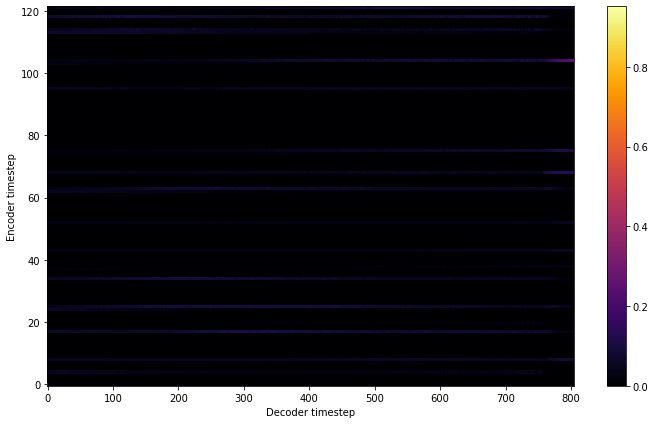

Saving model and optimizer state at iteration 26 to /content/drive/MyDrive/colab/outdir/test
Model Saved

Starting Epoch: 13 Iteration: 26


  0%|          | 0/2 [00:00<?, ?it/s]

执行了TextMelLoader的__getitem__
meian/meian_0004.npy
津田は無言のまま帯を締め直して、椅子の背に投げ掛けられた袴を取り上げながらまた医者の方を向いた。
<class 'NoneType'>
_symbols_to_sequence = %d [57, 56, 58, 41, 38, 60, 38, 11, 50, 58, 44, 52, 25, 51, 52, 11, 50, 38, 50, 38, 52, 39, 46, 52, 11, 56, 45, 46, 50, 42, 51, 38, 52, 56, 45, 20, 57, 42, 6, 11, 46, 56, 58, 51, 52, 11, 56, 42, 51, 46, 11, 51, 38, 44, 42, 48, 38, 48, 42, 55, 38, 55, 42, 57, 38, 11, 45, 38, 48, 38, 50, 38, 52, 11, 57, 52, 55, 46, 38, 44, 42, 51, 38, 44, 38, 55, 38, 11, 50, 38, 57, 38, 11, 46, 56, 45, 38, 51, 52, 11, 45, 52, 52, 52, 11, 50, 58, 46, 57, 38, 7]
在text_to_sequence这步，sequence = 
[57, 56, 58, 41, 38, 60, 38, 11, 50, 58, 44, 52, 25, 51, 52, 11, 50, 38, 50, 38, 52, 39, 46, 52, 11, 56, 45, 46, 50, 42, 51, 38, 52, 56, 45, 20, 57, 42, 6, 11, 46, 56, 58, 51, 52, 11, 56, 42, 51, 46, 11, 51, 38, 44, 42, 48, 38, 48, 42, 55, 38, 55, 42, 57, 38, 11, 45, 38, 48, 38, 50, 38, 52, 11, 57, 52, 55, 46, 38, 44, 42, 51, 38, 44, 38, 55, 38, 11, 50, 38, 57, 38, 11, 46, 56, 4

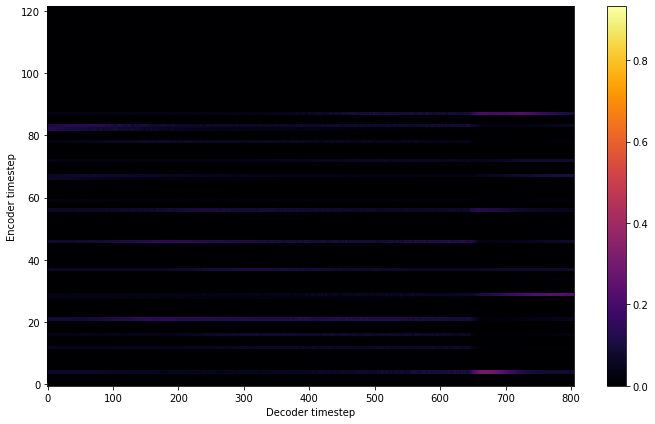

Saving model and optimizer state at iteration 28 to /content/drive/MyDrive/colab/outdir/test
Model Saved

Starting Epoch: 14 Iteration: 28
执行了TextMelLoader的__getitem__

  0%|          | 0/2 [00:00<?, ?it/s]


meian/meian_0004.npy
津田は無言のまま帯を締め直して、椅子の背に投げ掛けられた袴を取り上げながらまた医者の方を向いた。
<class 'NoneType'>
_symbols_to_sequence = %d [57, 56, 58, 41, 38, 60, 38, 11, 50, 58, 44, 52, 25, 51, 52, 11, 50, 38, 50, 38, 52, 39, 46, 52, 11, 56, 45, 46, 50, 42, 51, 38, 52, 56, 45, 20, 57, 42, 6, 11, 46, 56, 58, 51, 52, 11, 56, 42, 51, 46, 11, 51, 38, 44, 42, 48, 38, 48, 42, 55, 38, 55, 42, 57, 38, 11, 45, 38, 48, 38, 50, 38, 52, 11, 57, 52, 55, 46, 38, 44, 42, 51, 38, 44, 38, 55, 38, 11, 50, 38, 57, 38, 11, 46, 56, 45, 38, 51, 52, 11, 45, 52, 52, 52, 11, 50, 58, 46, 57, 38, 7]
在text_to_sequence这步，sequence = 
[57, 56, 58, 41, 38, 60, 38, 11, 50, 58, 44, 52, 25, 51, 52, 11, 50, 38, 50, 38, 52, 39, 46, 52, 11, 56, 45, 46, 50, 42, 51, 38, 52, 56, 45, 20, 57, 42, 6, 11, 46, 56, 58, 51, 52, 11, 56, 42, 51, 46, 11, 51, 38, 44, 42, 48, 38, 48, 42, 55, 38, 55, 42, 57, 38, 11, 45, 38, 48, 38, 50, 38, 52, 11, 57, 52, 55, 46, 38, 44, 42, 51, 38, 44, 38, 55, 38, 11, 50, 38, 57, 38, 11, 46, 56, 45, 38, 51, 52, 11, 45, 52, 5

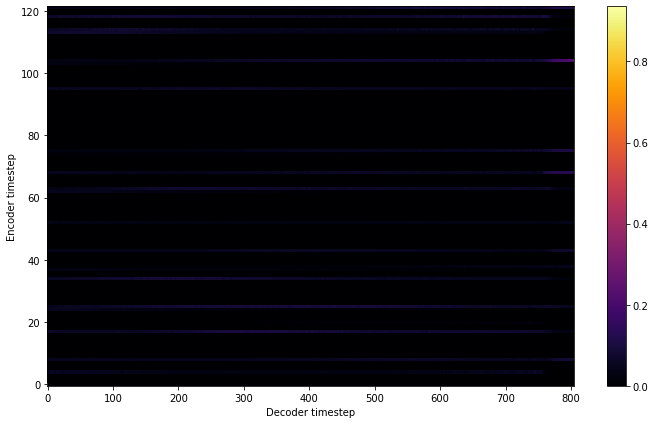

Saving model and optimizer state at iteration 30 to /content/drive/MyDrive/colab/outdir/test
Model Saved

Starting Epoch: 15 Iteration: 30


  0%|          | 0/2 [00:00<?, ?it/s]

执行了TextMelLoader的__getitem__
meian/meian_0004.npy
津田は無言のまま帯を締め直して、椅子の背に投げ掛けられた袴を取り上げながらまた医者の方を向いた。
<class 'NoneType'>
_symbols_to_sequence = %d [57, 56, 58, 41, 38, 60, 38, 11, 50, 58, 44, 52, 25, 51, 52, 11, 50, 38, 50, 38, 52, 39, 46, 52, 11, 56, 45, 46, 50, 42, 51, 38, 52, 56, 45, 20, 57, 42, 6, 11, 46, 56, 58, 51, 52, 11, 56, 42, 51, 46, 11, 51, 38, 44, 42, 48, 38, 48, 42, 55, 38, 55, 42, 57, 38, 11, 45, 38, 48, 38, 50, 38, 52, 11, 57, 52, 55, 46, 38, 44, 42, 51, 38, 44, 38, 55, 38, 11, 50, 38, 57, 38, 11, 46, 56, 45, 38, 51, 52, 11, 45, 52, 52, 52, 11, 50, 58, 46, 57, 38, 7]
在text_to_sequence这步，sequence = 
[57, 56, 58, 41, 38, 60, 38, 11, 50, 58, 44, 52, 25, 51, 52, 11, 50, 38, 50, 38, 52, 39, 46, 52, 11, 56, 45, 46, 50, 42, 51, 38, 52, 56, 45, 20, 57, 42, 6, 11, 46, 56, 58, 51, 52, 11, 56, 42, 51, 46, 11, 51, 38, 44, 42, 48, 38, 48, 42, 55, 38, 55, 42, 57, 38, 11, 45, 38, 48, 38, 50, 38, 52, 11, 57, 52, 55, 46, 38, 44, 42, 51, 38, 44, 38, 55, 38, 11, 50, 38, 57, 38, 11, 46, 56, 4

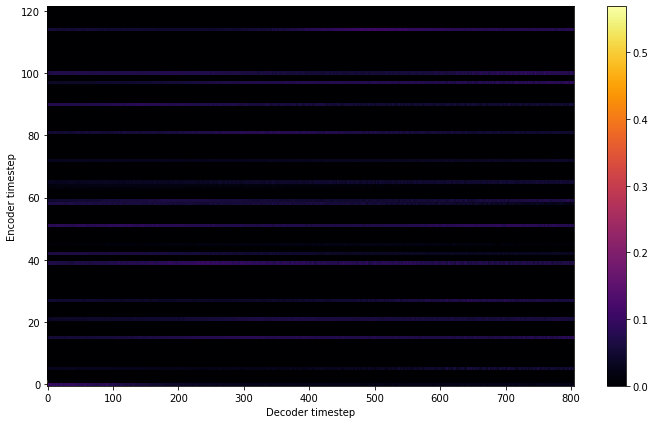

Saving model and optimizer state at iteration 32 to /content/drive/MyDrive/colab/outdir/test
Model Saved

Starting Epoch: 16 Iteration: 32
执行了TextMelLoader的__getitem__
meian/meian_0003.npy
両手を組み合わせたまま、ちょっと首を傾けた。その様子が「御気の毒ですが

  0%|          | 0/2 [00:00<?, ?it/s]


<class 'NoneType'>
_symbols_to_sequence = %d [55, 62, 52, 52, 57, 42, 52, 11, 48, 58, 50, 46, 38, 60, 38, 56, 42, 57, 38, 11, 50, 38, 50, 38, 6, 11, 40, 45, 52, 40, 49, 57, 52, 11, 48, 58, 39, 46, 52, 11, 48, 38, 57, 38, 50, 58, 48, 42, 57, 38, 7, 11, 56, 52, 51, 52, 11, 62, 52, 52, 56, 58, 44, 38, 11, 44, 52, 48, 46, 51, 52, 41, 52, 48, 58, 41, 42, 56, 32, 44, 38, 7]
在text_to_sequence这步，sequence = 
[55, 62, 52, 52, 57, 42, 52, 11, 48, 58, 50, 46, 38, 60, 38, 56, 42, 57, 38, 11, 50, 38, 50, 38, 6, 11, 40, 45, 52, 40, 49, 57, 52, 11, 48, 58, 39, 46, 52, 11, 48, 38, 57, 38, 50, 58, 48, 42, 57, 38, 7, 11, 56, 52, 51, 52, 11, 62, 52, 52, 56, 58, 44, 38, 11, 44, 52, 48, 46, 51, 52, 41, 52, 48, 58, 41, 42, 56, 32, 44, 38, 7]
tensor([55, 62, 52, 52, 57, 42, 52, 11, 48, 58, 50, 46, 38, 60, 38, 56, 42, 57,
        38, 11, 50, 38, 50, 38,  6, 11, 40, 45, 52, 40, 49, 57, 52, 11, 48, 58,
        39, 46, 52, 11, 48, 38, 57, 38, 50, 58, 48, 42, 57, 38,  7, 11, 56, 52,
        51, 52, 11, 62, 52, 52

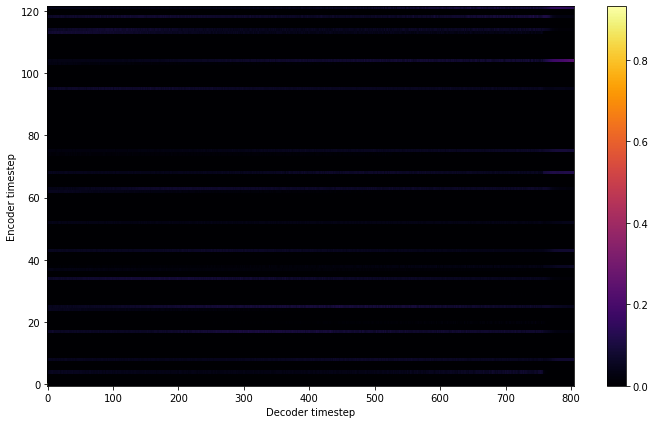

Saving model and optimizer state at iteration 34 to /content/drive/MyDrive/colab/outdir/test
Model Saved

Starting Epoch: 17 Iteration: 34
执行了TextMelLoader的__getitem__
meian/meian_0003.npy

  0%|          | 0/2 [00:00<?, ?it/s]


両手を組み合わせたまま、ちょっと首を傾けた。その様子が「御気の毒ですが
<class 'NoneType'>
_symbols_to_sequence = %d [55, 62, 52, 52, 57, 42, 52, 11, 48, 58, 50, 46, 38, 60, 38, 56, 42, 57, 38, 11, 50, 38, 50, 38, 6, 11, 40, 45, 52, 40, 49, 57, 52, 11, 48, 58, 39, 46, 52, 11, 48, 38, 57, 38, 50, 58, 48, 42, 57, 38, 7, 11, 56, 52, 51, 52, 11, 62, 52, 52, 56, 58, 44, 38, 11, 44, 52, 48, 46, 51, 52, 41, 52, 48, 58, 41, 42, 56, 32, 44, 38, 7]
在text_to_sequence这步，sequence = 
[55, 62, 52, 52, 57, 42, 52, 11, 48, 58, 50, 46, 38, 60, 38, 56, 42, 57, 38, 11, 50, 38, 50, 38, 6, 11, 40, 45, 52, 40, 49, 57, 52, 11, 48, 58, 39, 46, 52, 11, 48, 38, 57, 38, 50, 58, 48, 42, 57, 38, 7, 11, 56, 52, 51, 52, 11, 62, 52, 52, 56, 58, 44, 38, 11, 44, 52, 48, 46, 51, 52, 41, 52, 48, 58, 41, 42, 56, 32, 44, 38, 7]
tensor([55, 62, 52, 52, 57, 42, 52, 11, 48, 58, 50, 46, 38, 60, 38, 56, 42, 57,
        38, 11, 50, 38, 50, 38,  6, 11, 40, 45, 52, 40, 49, 57, 52, 11, 48, 58,
        39, 46, 52, 11, 48, 38, 57, 38, 50, 58, 48, 42, 57, 38,  7, 11, 56

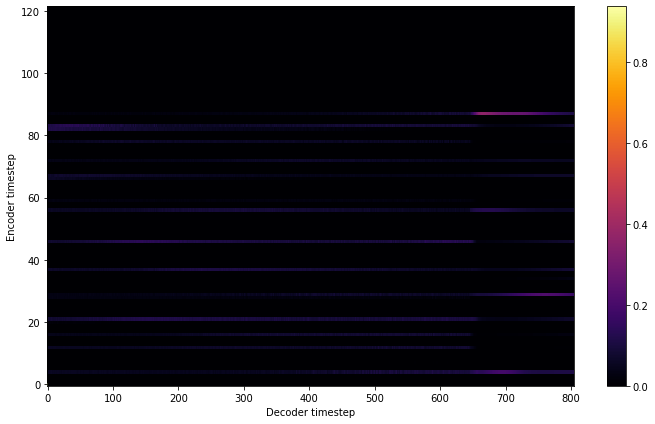

Saving model and optimizer state at iteration 36 to /content/drive/MyDrive/colab/outdir/test
Model Saved

Starting Epoch: 18 Iteration: 36


  0%|          | 0/2 [00:00<?, ?it/s]

执行了TextMelLoader的__getitem__
meian/meian_0008.npy
「切開です。切開して穴と腸といっしょにしてしまうんです。すると
<class 'NoneType'>
_symbols_to_sequence = %d [11, 56, 42, 40, 49, 48, 38, 46, 41, 42, 56, 32, 7, 11, 56, 42, 40, 49, 48, 38, 46, 11, 56, 45, 20, 57, 42, 11, 38, 51, 38, 57, 52, 11, 40, 45, 52, 52, 57, 52, 11, 46, 40, 49, 56, 45, 52, 51, 46, 11, 56, 45, 20, 57, 42, 11, 56, 45, 46, 50, 38, 58, 11, 25, 41, 42, 56, 32, 7, 11, 56, 58, 55, 58, 57, 52, 7]
在text_to_sequence这步，sequence = 
[11, 56, 42, 40, 49, 48, 38, 46, 41, 42, 56, 32, 7, 11, 56, 42, 40, 49, 48, 38, 46, 11, 56, 45, 20, 57, 42, 11, 38, 51, 38, 57, 52, 11, 40, 45, 52, 52, 57, 52, 11, 46, 40, 49, 56, 45, 52, 51, 46, 11, 56, 45, 20, 57, 42, 11, 56, 45, 46, 50, 38, 58, 11, 25, 41, 42, 56, 32, 7, 11, 56, 58, 55, 58, 57, 52, 7]
tensor([11, 56, 42, 40, 49, 48, 38, 46, 41, 42, 56, 32,  7, 11, 56, 42, 40, 49,
        48, 38, 46, 11, 56, 45, 20, 57, 42, 11, 38, 51, 38, 57, 52, 11, 40, 45,
        52, 52, 57, 52, 11, 46, 40, 49, 56, 45, 52, 51, 46, 11, 56, 4

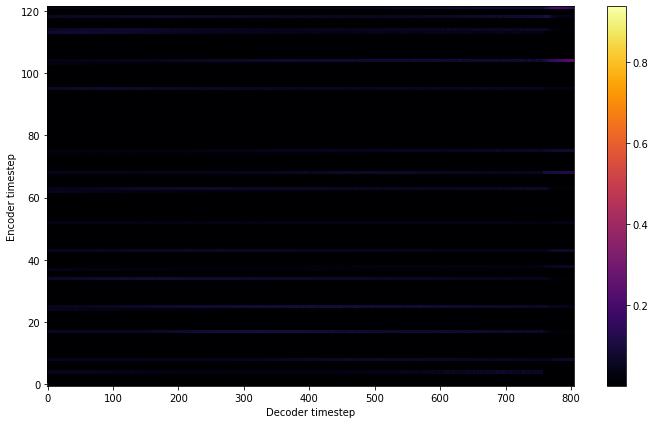

Saving model and optimizer state at iteration 38 to /content/drive/MyDrive/colab/outdir/test
Model Saved

Starting Epoch: 19 Iteration: 38
执行了TextMelLoader的__getitem__

  0%|          | 0/2 [00:00<?, ?it/s]


meian/meian_0007.npy
「ただ今までのように穴の掃除ばかりしていては駄目なんです。それじゃいつまで経っても肉の上りこはないから、
<class 'NoneType'>
_symbols_to_sequence = %d [11, 57, 38, 41, 38, 11, 46, 50, 38, 50, 38, 41, 42, 51, 52, 11, 62, 52, 52, 51, 46, 11, 38, 51, 38, 51, 52, 11, 56, 52, 52, 47, 46, 39, 38, 48, 38, 55, 46, 11, 56, 45, 20, 57, 42, 11, 46, 57, 42, 60, 38, 11, 41, 38, 50, 42, 51, 38, 11, 25, 41, 42, 56, 32, 7, 11, 56, 52, 55, 42, 47, 38, 11, 46, 57, 56, 58, 50, 38, 41, 42, 11, 57, 38, 40, 49, 57, 42, 50, 52, 11, 51, 46, 48, 58, 51, 52, 11, 58, 42, 11, 55, 46, 48, 52, 60, 38, 51, 38, 46, 48, 38, 55, 38, 6]
在text_to_sequence这步，sequence = 
[11, 57, 38, 41, 38, 11, 46, 50, 38, 50, 38, 41, 42, 51, 52, 11, 62, 52, 52, 51, 46, 11, 38, 51, 38, 51, 52, 11, 56, 52, 52, 47, 46, 39, 38, 48, 38, 55, 46, 11, 56, 45, 20, 57, 42, 11, 46, 57, 42, 60, 38, 11, 41, 38, 50, 42, 51, 38, 11, 25, 41, 42, 56, 32, 7, 11, 56, 52, 55, 42, 47, 38, 11, 46, 57, 56, 58, 50, 38, 41, 42, 11, 57, 38, 40, 49, 57, 42, 50, 52, 11, 51, 46, 48, 58, 51, 52, 1

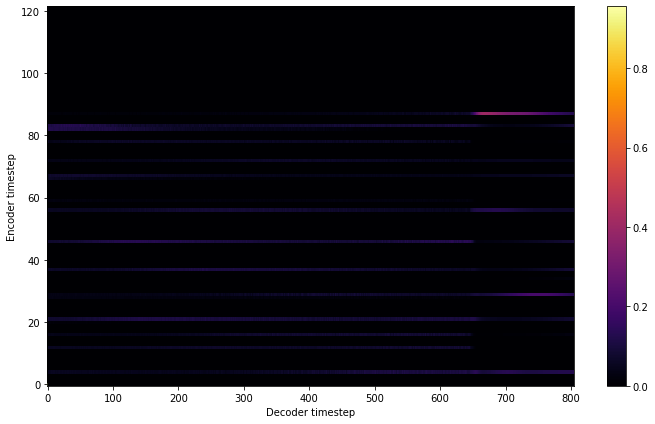

Saving model and optimizer state at iteration 40 to /content/drive/MyDrive/colab/outdir/test
Model Saved

Starting Epoch: 20 Iteration: 40
执行了TextMelLoader的__getitem__

  0%|          | 0/2 [00:00<?, ?it/s]


meian/meian_0002.npy
津田の顔には苦笑の裡に淡く盛り上げられた失望の色が見えた。医者は白いだぶだぶした上着の前に
<class 'NoneType'>
_symbols_to_sequence = %d [57, 56, 58, 41, 38, 51, 52, 11, 48, 38, 52, 51, 46, 60, 38, 11, 48, 32, 56, 45, 52, 52, 51, 52, 11, 58, 55, 38, 51, 46, 11, 38, 60, 38, 48, 58, 50, 52, 55, 46, 38, 44, 42, 55, 38, 55, 42, 57, 38, 11, 56, 45, 20, 57, 56, 58, 39, 52, 52, 51, 52, 11, 46, 55, 52, 44, 38, 11, 50, 46, 42, 57, 38, 7, 11, 46, 56, 45, 38, 60, 38, 11, 56, 45, 46, 55, 52, 46, 11, 41, 38, 39, 58, 41, 38, 39, 58, 11, 56, 45, 20, 57, 38, 11, 58, 60, 38, 44, 46, 51, 52, 11, 50, 38, 42, 51, 46, 7]
在text_to_sequence这步，sequence = 
[57, 56, 58, 41, 38, 51, 52, 11, 48, 38, 52, 51, 46, 60, 38, 11, 48, 32, 56, 45, 52, 52, 51, 52, 11, 58, 55, 38, 51, 46, 11, 38, 60, 38, 48, 58, 50, 52, 55, 46, 38, 44, 42, 55, 38, 55, 42, 57, 38, 11, 56, 45, 20, 57, 56, 58, 39, 52, 52, 51, 52, 11, 46, 55, 52, 44, 38, 11, 50, 46, 42, 57, 38, 7, 11, 46, 56, 45, 38, 60, 38, 11, 56, 45, 46, 55, 52, 46, 11, 41, 38, 39, 58, 41, 38, 39, 

KeyboardInterrupt: ignored

In [ ]:
#@title 开始训练
%cd /content/tacotron2
#@markdown  Validation loss 越小，拟合效果可能越好
train(output_directory, log_directory, checkpoint_path,
      warm_start, n_gpus, rank, group_name, hparams, log_directory2)

#语音合成

##用HiFi-GAN转换##

In [ ]:
#国际 HiFi-GAN 模型(有点机器音): 1qpgI41wNXFcH-iKq1Y42JlBC9j0je8PW
#@markdown 你训练好的tacotron2模型的路径填在`Tacotron2_Model`这里
Tacotron2_Model = '/content/drive/MyDrive/YOURMODEL'#@param {type:"string"}
TACOTRON2_ID = Tacotron2_Model
HIFIGAN_ID = "1qpgI41wNXFcH-iKq1Y42JlBC9j0je8PW"
#@markdown 选择预处理文本的cleaner
text_cleaner = 'japanese_phrase_cleaners'#@param {type:"string"}

# Check if Initilized
try:
    initilized
except NameError:
    print("Setting up, please wait.\n")
    !pip install tqdm -q
    from tqdm.notebook import tqdm
    with tqdm(total=5, leave=False) as pbar:
        %tensorflow_version 1.x
        import os
        from os.path import exists, join, basename, splitext
        !pip install gdown
        git_repo_url = 'https://github.com/CjangCjengh/tacotron2-japanese.git'
        project_name = splitext(basename(git_repo_url))[0]
        if not exists(project_name):
            # clone and install
            !git clone -q --recursive {git_repo_url}
            !git clone -q --recursive https://github.com/SortAnon/hifi-gan
            !pip install -q librosa unidecode
        pbar.update(1) # downloaded TT2 and HiFi-GAN
        import sys
        sys.path.append('hifi-gan')
        sys.path.append(project_name)
        import time
        import matplotlib
        import matplotlib.pylab as plt
        import gdown
        d = 'https://drive.google.com/uc?id='

        %matplotlib inline
        import IPython.display as ipd
        import numpy as np
        import torch
        import json
        from hparams import create_hparams
        from model import Tacotron2
        from layers import TacotronSTFT
        from audio_processing import griffin_lim
        from text import text_to_sequence
        from env import AttrDict
        from meldataset import MAX_WAV_VALUE
        from models import Generator

        pbar.update(1) # initialized Dependancies

        graph_width = 900
        graph_height = 360
        def plot_data(data, figsize=(int(graph_width/100), int(graph_height/100))):
            %matplotlib inline
            fig, axes = plt.subplots(1, len(data), figsize=figsize)
            for i in range(len(data)):
                axes[i].imshow(data[i], aspect='auto', origin='bottom', 
                            interpolation='none', cmap='inferno')
            fig.canvas.draw()
            plt.show()

        # Setup Pronounciation Dictionary
        !gdown --id '1E12g_sREdcH5vuZb44EZYX8JjGWQ9rRp'
        thisdict = {}
        for line in reversed((open('merged.dict.txt', "r").read()).splitlines()):
            thisdict[(line.split(" ",1))[0]] = (line.split(" ",1))[1].strip()

        pbar.update(1) # Downloaded and Set up Pronounciation Dictionary

        def ARPA(text, punctuation=r"!?,.;", EOS_Token=True):
            out = ''
            for word_ in text.split(" "):
                word=word_; end_chars = ''
                while any(elem in word for elem in punctuation) and len(word) > 1:
                    if word[-1] in punctuation: end_chars = word[-1] + end_chars; word = word[:-1]
                    else: break
                try:
                    word_arpa = thisdict[word.upper()]
                    word = "{" + str(word_arpa) + "}"
                except KeyError: pass
                out = (out + " " + word + end_chars).strip()
            if EOS_Token and out[-1] != ";": out += ";"
            return out

        def get_hifigan(MODEL_ID):
            # Download HiFi-GAN
            hifigan_pretrained_model = 'hifimodel'
            gdown.download(d+MODEL_ID, hifigan_pretrained_model, quiet=False)
            if not exists(hifigan_pretrained_model):
                raise Exception("HiFI-GAN model failed to download!")

            # Load HiFi-GAN
            conf = os.path.join("hifi-gan", "config_v1.json")
            with open(conf) as f:
                json_config = json.loads(f.read())
            h = AttrDict(json_config)
            torch.manual_seed(h.seed)
            hifigan = Generator(h).to(torch.device("cuda"))
            state_dict_g = torch.load(hifigan_pretrained_model, map_location=torch.device("cuda"))
            hifigan.load_state_dict(state_dict_g["generator"])
            hifigan.eval()
            hifigan.remove_weight_norm()
            return hifigan, h

        hifigan, h = get_hifigan(HIFIGAN_ID)
        pbar.update(1) # Downloaded and Set up HiFi-GAN

        def has_MMI(STATE_DICT):
            return any(True for x in STATE_DICT.keys() if "mi." in x)

        def get_Tactron2(MODEL_ID):
            # Download Tacotron2
            tacotron2_pretrained_model = TACOTRON2_ID
            if not exists(tacotron2_pretrained_model):
                raise Exception("Tacotron2 model failed to download!")
            # Load Tacotron2 and Config
            hparams = create_hparams()
            hparams.sampling_rate = 22050
            hparams.max_decoder_steps = 3000 # Max Duration
            hparams.gate_threshold = 0.25 # Model must be 25% sure the clip is over before ending generation
            model = Tacotron2(hparams)
            state_dict = torch.load(tacotron2_pretrained_model)['state_dict']
            if has_MMI(state_dict):
                raise Exception("ERROR: This notebook does not currently support MMI models.")
            model.load_state_dict(state_dict)
            _ = model.cuda().eval().half()
            return model, hparams

        model, hparams = get_Tactron2(TACOTRON2_ID)
        previous_tt2_id = TACOTRON2_ID

        pbar.update(1) # Downloaded and Set up Tacotron2

        # Extra Info
        def end_to_end_infer(text, pronounciation_dictionary, show_graphs):
            for i in [x for x in text.split("\n") if len(x)]:
                if not pronounciation_dictionary:
                    if i[-1] != ";": i=i+";" 
                else: i = ARPA(i)
                with torch.no_grad(): # save VRAM by not including gradients
                    sequence = np.array(text_to_sequence(i, [text_cleaner]))[None, :]
                    sequence = torch.autograd.Variable(torch.from_numpy(sequence)).cuda().long()
                    mel_outputs, mel_outputs_postnet, _, alignments = model.inference(sequence)
                    if show_graphs:
                        plot_data((mel_outputs_postnet.float().data.cpu().numpy()[0],
                                alignments.float().data.cpu().numpy()[0].T))
                    y_g_hat = hifigan(mel_outputs_postnet.float())
                    audio = y_g_hat.squeeze()
                    audio = audio * MAX_WAV_VALUE
                    print("")
                    ipd.display(ipd.Audio(audio.cpu().numpy().astype("int16"), rate=hparams.sampling_rate))
    from IPython.display import clear_output
    clear_output()
    initilized = "Ready"

if previous_tt2_id != TACOTRON2_ID:
    print("Updating Models")
    model, hparams = get_Tactron2(TACOTRON2_ID)
    hifigan, h = get_hifigan(HIFIGAN_ID)
    previous_tt2_id = TACOTRON2_ID

pronounciation_dictionary = False #@param {type:"boolean"}
# disables automatic ARPAbet conversion, useful for inputting your own ARPAbet pronounciations or just for testing
show_graphs = True #@param {type:"boolean"}
max_duration = 25 #this does nothing
model.decoder.max_decoder_steps = 1000 #@param {type:"integer"}
stop_threshold = 0.324 #@param {type:"number"}
model.decoder.gate_threshold = stop_threshold

#@markdown ---

print(f"Current Config:\npronounciation_dictionary: {pronounciation_dictionary}\nshow_graphs: {show_graphs}\nmax_duration (in seconds): {max_duration}\nstop_threshold: {stop_threshold}\n\n")

time.sleep(1)
print("输入要转换成语音的文本.")
contents = []
while True:
    try:
        print("-"*50)
        line = input()
        if line == "":
            continue
        end_to_end_infer(line, pronounciation_dictionary, show_graphs)
    except EOFError:
        break
    except KeyboardInterrupt:
        print("程序终止...")
        break

In [10]:
#@title 安装 Tacotron 和 Waveglow
!pip install -U tensorflow==1.15.2
import os
from os.path import exists, join, basename, splitext
!pip install gdown
git_repo_url = 'https://github.com/CjangCjengh/tacotron2-japanese.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install
  !git clone -q --recursive {git_repo_url}
  !cd {project_name}/waveglow && git checkout 2fd4e63
  !pip install -q librosa unidecode
  
import sys
sys.path.append(join(project_name, 'waveglow/'))
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
import gdown
d = 'https://drive.google.com/uc?id='

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==1.15.2 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0)
ERROR: No matching distribution found for tensorflow==1.15.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#@title 加载预训练模型
force_download_TT2 = True
tacotron2_pretrained_model = '/content/ayachi_nene_1'#@param {type:"string"}
waveglow_pretrained_model = '/PATH/waveglow_256channels_ljs_v3.pt'#@param {type:"string"}

In [ ]:
!gdown --id

In [11]:
#@title 安装 Tacotron 和 Waveglow 
%matplotlib inline
import IPython.display as ipd
import numpy as np
import torch

from hparams import create_hparams
from model import Tacotron2
from layers import TacotronSTFT
from audio_processing import griffin_lim
from text import text_to_sequence
from denoiser import Denoiser

graph_width = 900
graph_height = 360
def plot_data(data, figsize=(int(graph_width/100), int(graph_height/100))):
    %matplotlib inline
    fig, axes = plt.subplots(1, len(data), figsize=figsize)
    for i in range(len(data)):
        axes[i].imshow(data[i], aspect='auto', origin='bottom', 
                       interpolation='none', cmap='inferno')
    fig.canvas.draw()
    plt.show()

!gdown --id '1E12g_sREdcH5vuZb44EZYX8JjGWQ9rRp'
thisdict = {}
for line in reversed((open('merged.dict.txt', "r").read()).splitlines()):
    thisdict[(line.split(" ",1))[0]] = (line.split(" ",1))[1].strip()
def ARPA(text):
    out = ''
    for word_ in text.split(" "):
        word=word_; end_chars = ''
        while any(elem in word for elem in r"!?,.;") and len(word) > 1:
            if word[-1] == '!': end_chars = '!' + end_chars; word = word[:-1]
            if word[-1] == '?': end_chars = '?' + end_chars; word = word[:-1]
            if word[-1] == ',': end_chars = ',' + end_chars; word = word[:-1]
            if word[-1] == '.': end_chars = '.' + end_chars; word = word[:-1]
            if word[-1] == ';': end_chars = ';' + end_chars; word = word[:-1]
            else: break
        try: word_arpa = thisdict[word.upper()]
        except: word_arpa = ''
        if len(word_arpa)!=0: word = "{" + str(word_arpa) + "}"
        out = (out + " " + word + end_chars).strip()
    if out[-1] != ";": out = out + ";"
    return out

#torch.set_grad_enabled(False)

# initialize Tacotron2 with the pretrained model
hparams = create_hparams()

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1E12g_sREdcH5vuZb44EZYX8JjGWQ9rRp 



FileNotFoundError: ignored

In [15]:
#@title 参数
hparams = create_hparams()
# Load Tacotron2 (run this cell every time you change the model)
hparams.sampling_rate = 22050 # Don't change this
hparams.max_decoder_steps = 1000 # How long the audio will be before it cuts off (1000 is about 11 seconds)
hparams.gate_threshold = 0.1 # Model must be 90% sure the clip is over before ending generation (the higher this number is, the more likely that the AI will keep generating until it reaches the Max Decoder Steps)
model = Tacotron2(hparams)
model.load_state_dict(torch.load('/content/ayachi_nene_1')['state_dict'])
_ = model.cuda().eval().half()

# Load WaveGlow
waveglow = torch.load(waveglow_pretrained_model)['model']
waveglow.cuda().eval().half()
for k in waveglow.convinv:
    k.float()
denoiser = Denoiser(waveglow)

RuntimeError: ignored

In [ ]:
hparams = create_hparams()
# Load Tacotron2 (run this cell every time you change the model)
hparams.sampling_rate = 22050 # Don't change this
hparams.max_decoder_steps = 1000 # How long the audio will be before it cuts off (1000 is about 11 seconds)
hparams.gate_threshold = 0.1 # Model must be 90% sure the clip is over before ending generation (the higher this number is, the more likely that the AI will keep generating until it reaches the Max Decoder Steps)
model = Tacotron2(hparams)
model.load_state_dict(torch.load(tacotron2_pretrained_model)['state_dict'])
_ = model.cuda().eval().half()


合成

In [12]:
text = 'Your Text Here'

sigma = 0.8
denoise_strength = 0.324
raw_input = True # should be True if synthesizing a non-English language

for i in text.split("\n"):
    if len(i) < 1: continue;
    print(i)
    if raw_input:
        if i[-1] != ";": i=i+";" 
    else: i = ARPA(i)
    print(i)
    with torch.no_grad(): # save VRAM by not including gradients
        sequence = np.array(text_to_sequence(i, ['english_cleaners']))[None, :]
        sequence = torch.autograd.Variable(torch.from_numpy(sequence)).cuda().long()
        mel_outputs, mel_outputs_postnet, _, alignments = model.inference(sequence)
        plot_data((mel_outputs_postnet.float().data.cpu().numpy()[0],
                alignments.float().data.cpu().numpy()[0].T))
        audio = waveglow.infer(mel_outputs_postnet, sigma=sigma); print(""); ipd.display(ipd.Audio(audio[0].data.cpu().numpy(), rate=hparams.sampling_rate))

Your Text Here
Your Text Here;


NameError: ignored

# infer

## Import libraries and setup matplotlib

In [19]:
%cd /content/tacotron2
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt

import IPython.display as ipd

import sys
sys.path.append('waveglow/')
import numpy as np
import torch

from hparams import create_hparams
from model import Tacotron2
from layers import TacotronSTFT, STFT
from audio_processing import griffin_lim
from train import load_model
from text import text_to_sequence
from denoiser import Denoiser

/content/tacotron2


In [20]:
def plot_data(data, figsize=(16, 4)):
    fig, axes = plt.subplots(1, len(data), figsize=figsize)
    for i in range(len(data)):
        axes[i].imshow(data[i], aspect='auto', origin='bottom', 
                       interpolation='none')

## Setup hparams

In [21]:
hparams = create_hparams()
hparams.sampling_rate = 22050

## Load model from checkpoint

In [22]:
checkpoint_path = "/content/tacotron2_statedict.pt"
model = load_model(hparams)
model.load_state_dict(torch.load(checkpoint_path)['state_dict'])
_ = model.cuda().eval().half()

## Load WaveGlow for mel2audio synthesis and denoiser

In [12]:
waveglow_path = '/content/waveglow_256channels_universal_v5.pt'
waveglow = torch.load(waveglow_path)['model']
waveglow.cuda().eval().half()
for k in waveglow.convinv:
    k.float()
denoiser = Denoiser(waveglow)

/usr/local/lib/python3.8/dist-packages/torch/serialization.py:868: SourceChangeWarning: source code of class 'torch.nn.modules.conv.ConvTranspose1d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.8/dist-packages/torch/serialization.py:868: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.8/dist-packages/torch/serialization.py:868: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv1d' has changed. you can retrieve the original source code by accessing the object's source attribute or

## Prepare text input

In [16]:
text = "Waveglow is really awesome!Waveglow is really awesome!Waveglow is really awesome!Waveglow is really awesome!Waveglow is really awesome!"
sequence = np.array(text_to_sequence(text, ['english_cleaners']))[None, :]
sequence = torch.autograd.Variable(
    torch.from_numpy(sequence)).cuda().long()

## Decode text input and plot results

In [17]:
mel_outputs, mel_outputs_postnet, _, alignments = model.inference(sequence)
plot_data((mel_outputs.float().data.cpu().numpy()[0],
           mel_outputs_postnet.float().data.cpu().numpy()[0],
           alignments.float().data.cpu().numpy()[0].T))

## Synthesize audio from spectrogram using WaveGlow

In [18]:
with torch.no_grad():
    audio = waveglow.infer(mel_outputs_postnet, sigma=0.666)
ipd.Audio(audio[0].data.cpu().numpy(), rate=hparams.sampling_rate)